# WATER POTABILITY:
## TASKS: 
* Trainig a machine learning model using XGBoost to predict potabality of water with given parameters of:
1. ph
2. hardness
3. solids
4. chloramines
5. sulfate
6. conductivity
7. organic carbon
8. trihalomethanes
9. turbidity
* To predict podability for custom user inputted values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv(r"C:\Users\Kiruthika Murugesan\Desktop\CSE_lang\projects\data_analysis\water_potability\water_potability.csv")
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
data.fillna(data.mean(), inplace = True)
data.head(10)
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [4]:
x = data.drop('Potability', axis=1)
y = data['Potability']
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') 

In [6]:
!pip install scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier

estimators = [('scaler', StandardScaler()), ('clf', XGBClassifier(random_state=8))]
pipe = Pipeline(steps = estimators)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [7]:
search_space = {
'clf__n_estimators': Integer(100,1000),
'clf__max_depth': Integer(3,12),
'clf__learning_rate': Real(0.01,0.2,prior='log-uniform'),
'clf__subsample': Real(0.7, 1.0),
'clf__colsample_bytree': Real(0.7, 1.0),
'clf__min_child_weight' : Integer(1,10),
'clf__scale_pos_weight' :Real(1,10),
'clf__colsample_bylevel': Real(0.5, 1.0),
'clf__colsample_bynode': Real(0.5, 1.0),
'clf__reg_alpha': Real(0.0, 10.0),
'clf__reg_lambda': Real(0.0, 10.0),
'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=30,scoring = 'roc_auc', random_state=8)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
opt.fit(x_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=N...
                             'clf__n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__scale_pos_weight': Real(low=1, high=10, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.7, high=1.0, prior='uniform', transform='normalize')})

In [8]:
opt.best_estimator_
opt.best_score_
opt.score(x_test,y_test)
y_pred = opt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100: .2f}%')

conf_mat= confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_mat)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report: ")
print(class_report) 

Accuracy:  48.48%
Confusion Matrix: 
[[ 90 322]
 [ 16 228]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.22      0.35       412
           1       0.41      0.93      0.57       244

    accuracy                           0.48       656
   macro avg       0.63      0.58      0.46       656
weighted avg       0.69      0.48      0.43       656



## Let us resample the data:
### Reasons:
1. The dataset is small (3276 entries)
2. Data is not shuffled properly- Imbalanced Class Distribution
3. There is lesser number of potable water entries than non potable water entries

In [27]:
from sklearn.utils import resample, shuffle
not_p = data[data['Potability']==0]
p = data[data['Potability']==1]

minority_unsampled = resample(p, replace =True, n_samples =1100)
data = shuffle(pd.concat([not_p, minority_unsampled]))

In [44]:
from sklearn.preprocessing import StandardScaler
x = data.drop('Potability', axis=1)
y = data['Potability']
std = StandardScaler()
x = std.fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1)
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
params ={'n:estimators': [50,100,250, 400,600,800, 1000], 'learning_rate': [0.2, 0.5, 0.8,1]}

In [46]:
#hyperparameter tuning:
from sklearn.model_selection import RandomizedSearchCV
reg_xgb = RandomizedSearchCV(xgb, param_distributions = params, cv=5)
reg_xgb.fit(x_train, y_train)

y_pred = reg_xgb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy *100: .4f}%')

Accuracy:  88.7097%


<Axes: >

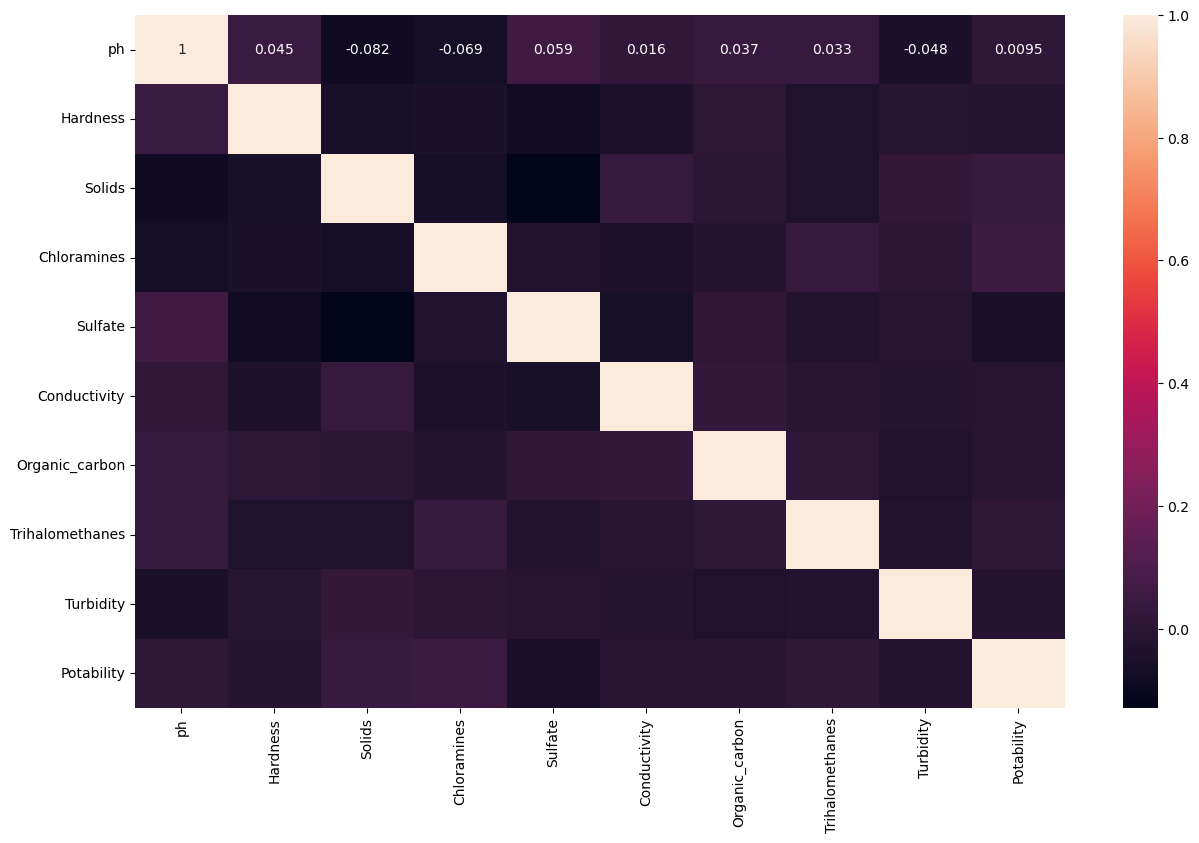

In [47]:
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot=True)

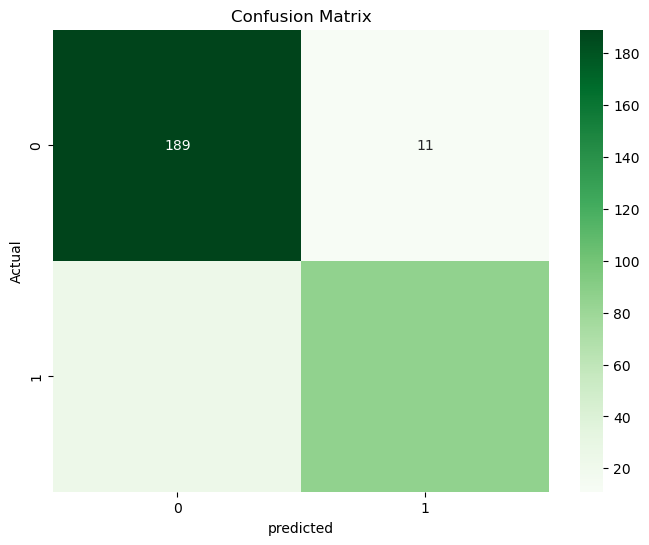

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt= 'd',cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
class_report= classification_report(y_test, y_pred)
print("Classification Report: ")
print(class_report)

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       200
           1       0.89      0.78      0.83       110

    accuracy                           0.89       310
   macro avg       0.89      0.86      0.87       310
weighted avg       0.89      0.89      0.89       310



### Predict potability of water for custom single entry:

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler

import builtins
input = builtins.input

def get_input(prompt):
    return float(input(prompt))

ph = get_input("Enter the pH value: ")
hardness = get_input("Enter the Hardness: ")
solids = get_input("Enter the Solids concentration: ")
chloramines = get_input("Enter the Chloramines concentration: ")
sulfate = get_input("Enter the Sulfate concentration: ")
conductivity = get_input("Enter the Conductivity: ")
organic_carbon = get_input("Enter the Organic Carbon: ")
trihalomethanes = get_input("Enter the Trihalomethanes concentration: ")
turbidity = get_input("Enter the Turbidity: ")

input_values = [ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]
input_array = np.array(input_values).reshape(1, -1)

scaled_input_array = std.transform(input_array)
prediction = reg_xgb.predict(scaled_input_array)  

if prediction == 1:
    print("The water is predicted to be potable.")
else:
    print("The water is predicted to be non-potable.")


Enter the pH value:  3.716
Enter the Hardness:  123.4229
Enter the Solids concentration:  18630.06
Enter the Chloramines concentration:  6.635
Enter the Sulfate concentration:  368.5164
Enter the Conductivity:  592.8854
Enter the Organic Carbon:  15.19001
Enter the Trihalomethanes concentration:  56.32908
Enter the Turbidity:  4.5006


The water is predicted to be non-potable.
